In [1]:
import seaborn as sns
from pandas import read_csv, DataFrame #,get_dummies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from sklearn.metrics import pairwise_distances


In [2]:
amr = read_csv('Amazon - Movies and TV Ratings.csv')

In [3]:
amrdes = amr.describe()

In [4]:
amrdes

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
count,1.0,1.0,1.0,2.0,29.000000,1.0,1.0,1.0,1.0,1.0,...,5.000000,2.0,1.0,8.000000,3.000000,6.000000,1.0,8.000000,35.000000,13.000000
mean,5.0,5.0,2.0,5.0,4.103448,4.0,5.0,5.0,5.0,5.0,...,3.800000,5.0,5.0,4.625000,4.333333,4.333333,3.0,4.375000,4.628571,4.923077
std,NaN,NaN,NaN,0.0,1.496301,NaN,NaN,NaN,NaN,NaN,...,1.643168,0.0,NaN,0.517549,1.154701,1.632993,NaN,1.407886,0.910259,0.277350
min,5.0,5.0,2.0,5.0,1.000000,4.0,5.0,5.0,5.0,5.0,...,1.000000,5.0,5.0,4.000000,3.000000,1.000000,3.0,1.000000,1.000000,4.000000
25%,5.0,5.0,2.0,5.0,4.000000,4.0,5.0,5.0,5.0,5.0,...,4.000000,5.0,5.0,4.000000,4.000000,5.000000,3.0,4.750000,5.000000,5.000000
50%,5.0,5.0,2.0,5.0,5.000000,4.0,5.0,5.0,5.0,5.0,...,4.000000,5.0,5.0,5.000000,5.000000,5.000000,3.0,5.000000,5.000000,5.000000
75%,5.0,5.0,2.0,5.0,5.000000,4.0,5.0,5.0,5.0,5.0,...,5.000000,5.0,5.0,5.000000,5.000000,5.000000,3.0,5.000000,5.000000,5.000000
max,5.0,5.0,2.0,5.0,5.000000,4.0,5.0,5.0,5.0,5.0,...,5.000000,5.0,5.0,5.000000,5.000000,5.000000,3.0,5.000000,5.000000,5.000000


In [5]:
amrdes.T['count'].sort_values(ascending=False)[0:2]
# Which movies have maximum views/ratings? Movie127

Movie127    2313.0
Movie140     578.0
Name: count, dtype: float64

In [6]:
amrdes.T['mean'].mean()
# What is the average rating for each movie? overall average of average-rating per movie = 4.45

4.448436665448387

##  best Movies by sum of ratings

In [7]:
amr.fillna(0).drop(['user_id'], axis=1).sum().sort_values(ascending=False).head(5)

Movie127    9511.0
Movie140    2794.0
Movie16     1446.0
Movie103    1241.0
Movie29     1168.0
dtype: float64

##  best Movies by mean

### At least 24 people should have reviewed a movie to consider that movie to be best movie by avg-rating 

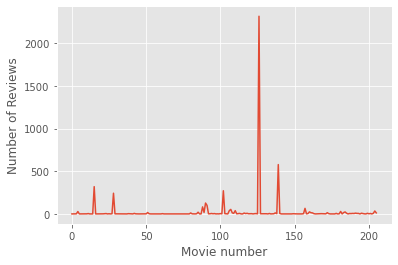

,mean
Movie140,4.834
Movie158,4.818
Movie29,4.807
Movie92,4.772
Movie182,4.733


In [8]:
amrdes.T['count'].reset_index(drop=True).plot(kind='line', xlabel='Movie number', ylabel='Number of Reviews')
plt.show()
# (minimum of about 10% of max counts or average counts) will be considered for selecting best 5 movies by average ratings
# 24.2 is the average of count list
amrdes.T['mean'][amrdes.T['count'] > 24].sort_values(ascending=False)[:5].to_frame().round(3)

In [9]:
amrdes.T['count'].sort_values()[:5].to_frame()
# Define the top 5 movies with the least audience.

,count
Movie1,1.0
Movie71,1.0
Movie145,1.0
Movie69,1.0
Movie68,1.0


In [13]:
amr.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


+ ###  Prediction are done using Colaborative filtering from similarity scores

In [14]:
amrvals = amr.drop('user_id', axis=1).fillna(0)
usrMean = amrvals.mean(axis=1)
ratdiff = (amrvals.values - usrMean.values.reshape(-1,1))

#amrvals.mean(axis=1).values.reshape(-1,1)[:5]

In [15]:
usrscores = pairwise_distances(amrvals, metric='cosine')
movscores = pairwise_distances(amrvals.T, metric='cosine')
predction = usrMean.values.reshape(len(amrvals),-1) + usrscores.dot(ratdiff)/np.array([np.abs(usrscores).sum(axis=1)]).T

In [21]:
user_predection = DataFrame(predction, columns=amrvals.columns).round(3)

In [22]:
user_predection

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,0.027,0.027,0.027,0.029,0.051,0.027,0.028,0.028,0.028,0.028,...,0.031,0.029,0.028,0.034,0.029,0.032,0.027,0.034,0.060,0.040
1,-0.011,-0.011,-0.012,-0.010,0.012,-0.011,-0.011,-0.011,-0.011,-0.011,...,-0.008,-0.010,-0.011,-0.005,-0.010,-0.007,-0.012,-0.005,0.021,0.001
2,0.003,0.003,0.003,0.002,0.027,0.003,0.003,0.003,0.003,0.003,...,0.006,0.004,0.003,0.010,0.005,0.008,0.003,0.010,0.036,0.016
3,0.003,0.003,0.003,0.002,0.027,0.003,0.003,0.003,0.003,0.003,...,0.006,0.004,0.003,0.010,0.005,0.008,0.003,0.010,0.036,0.016
4,0.003,0.003,0.003,0.004,0.002,0.003,0.003,0.003,0.003,0.003,...,0.006,0.004,0.003,0.010,0.005,0.008,0.003,0.010,0.036,0.016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4843,0.003,0.003,0.003,0.004,0.027,0.003,0.003,0.003,0.003,0.003,...,0.006,0.004,0.003,0.010,0.005,0.008,0.003,0.010,0.036,0.002
4844,0.003,0.003,0.003,0.004,0.027,0.003,0.003,0.003,0.003,0.003,...,0.006,0.004,0.003,0.010,0.005,0.008,0.003,0.010,0.036,0.002
4845,0.003,0.003,0.003,0.004,0.027,0.003,0.003,0.003,0.003,0.003,...,0.006,0.004,0.003,0.010,0.005,0.008,0.003,0.010,0.036,0.002
4846,0.003,0.003,0.003,0.004,0.027,0.003,0.003,0.003,0.003,0.003,...,0.006,0.004,0.003,0.010,0.005,0.008,0.003,0.010,0.036,0.002


In [23]:
user_predection.sum(axis=1).sort_values(ascending=False)

1899    30.014
4114    25.024
3850    24.970
753     24.022
784     19.980
         ...  
2028     0.978
2564     0.978
3475     0.978
2755     0.978
2618     0.978
Length: 4848, dtype: float64